# Axis Insurance Data Analysis

**By: Jacob Siegel**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 
import matplotlib.pyplot as plt
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

### Part 1: Exploratory Data Analysis (EDA)

    Load data, check for duplicates and missing value.
    Initial data observations and statistics.

In [3]:
#Load Axis Insurance data set and view 
AI = pd.read_csv("AxisInsurance.csv")
AI.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Determine the size of the data set
AI.shape

(1338, 7)

In [5]:
#Determine if there are any duplicates in the data
temp=AI.duplicated()
print('data contains:', sum(temp), 'duplicate lines')

data contains: 1 duplicate lines


In [6]:
#Remove duplicated line from original data set and call it "Data"
Data = AI.drop_duplicates()

In [7]:
#Determine if there are any missing values in the data
print('data contains:', Data.isnull().sum().sum(), 'missing values')

data contains: 0 missing values


In [221]:
Data.describe()

,age,bmi,children,charges
count,1337.00000,1337.00000,1337.00000,1337.00000
mean,39.22214,30.66345,1.09574,13279.12149
std,14.04433,6.10047,1.20557,12110.35966
min,18.00000,15.96000,0.00000,1121.87390
25%,27.00000,26.29000,0.00000,4746.34400
50%,39.00000,30.40000,1.00000,9386.16130
75%,51.00000,34.70000,2.00000,16657.71745
max,64.00000,53.13000,5.00000,63770.42801


In [222]:
#create a data frame with the Count (total population) of each region 
Count = pd.DataFrame({'Region' : [], 'Count': []})     #create black dataframe called Count
for i in Data['region'].unique():                      #loop through regions to count total
    temp = Data[Data['region'] == i]['region'].count()
    temp2 = pd.DataFrame({'Region': [i], 'Count': [temp]})
    Count  = Count.append(temp2)
Count

,Region,Count
0,southwest,325.00000
0,southeast,364.00000
0,northwest,324.00000
0,northeast,324.00000


In [223]:
#create a data frame with the Count (total population) of other categorical variables. 
Count1 = pd.DataFrame({'Category' : [], 'Count': []}) #create black dataframe called Count1

#Total number of smokers in the data:
temp1 = pd.DataFrame({'Category': 'Smoker', 'Count': [Data[Data['smoker'] == 'yes']['smoker'].count()]})

#Total number of non-smokers in the data:
temp2 = pd.DataFrame({'Category': 'NonSmoker', 'Count': [Data[Data['smoker'] == 'no']['smoker'].count()]})

#Total number of males in the data:
temp3 = pd.DataFrame({'Category': 'Male', 'Count': [Data[Data['sex'] == 'male']['sex'].count()]})

#Total number of females in the data:
temp4 = pd.DataFrame({'Category': 'Felame', 'Count': [Data[Data['sex'] == 'female']['sex'].count()]})

Count1  = Count1.append(temp1)
Count1  = Count1.append(temp2)
Count1  = Count1.append(temp3)
Count1  = Count1.append(temp4)

Count1

,Category,Count
0,Smoker,274.00000
0,NonSmoker,1063.00000
0,Male,675.00000
0,Felame,662.00000


In [224]:
#create a data frame with the Count (total population) of people with children.
Count2 = pd.DataFrame({'Children' : [], 'Count': []})
for i in range(0,6):   #Loop through total children
    temp = pd.DataFrame({'Children': i, 'Count': [Data[Data['children'] == i]['children'].count()]})
    Count2  = Count2.append(temp)
Count2

,Children,Count
0,0.00000,573.00000
0,1.00000,324.00000
0,2.00000,240.00000
0,3.00000,157.00000
0,4.00000,25.00000
0,5.00000,18.00000


<AxesSubplot:xlabel='age', ylabel='Density'>

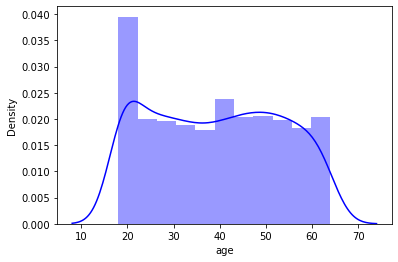

In [225]:
#Plot of age disribution 
sns.distplot(Data['age'],color='blue')

<AxesSubplot:xlabel='charges', ylabel='Density'>

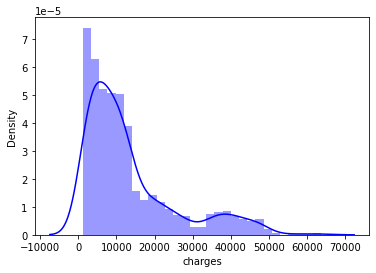

In [226]:
#Plot of charges disribution 
sns.distplot(Data['charges'],color='blue')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

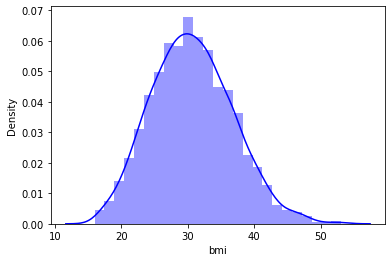

In [227]:
#Plot of bmi disribution 
sns.distplot(Data['bmi'],color='blue')

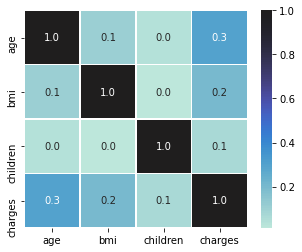

In [228]:
#Correlation plot
plt.figure(figsize=(5,4))
sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

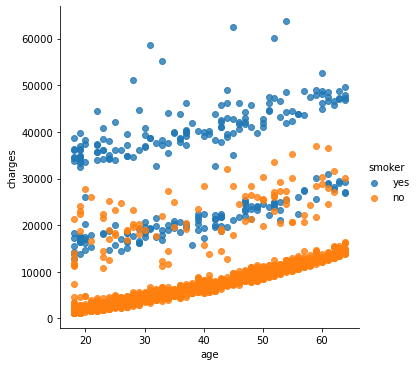

In [229]:
#Age and charges has the highest correlation in the data
#Make a plot of age and correlation colored by smoker 
sns.lmplot(x='age', y='charges',data=Data,fit_reg=False, hue='smoker')

### Part 2: Smoker vs Non Smoker

    Difference in charges 
    EDA for other aspects of smokers vs non-smokers

In [230]:
#create a sub-set of data fro smokers and non-smokers
Smoker = Data[Data['smoker'] == 'yes']
NonSmoker= Data[Data['smoker'] == 'no']

print('Smoker average charges:', Smoker['charges'].mean())
print('NonSmoker average charges:', NonSmoker['charges'].mean())

#Determine P-values for Charges, Age, BMI and Children when comapring Smokers vs. Non Smokers

t_statistic, p_value = ttest_ind(Smoker['charges'], NonSmoker['charges'])
print('P value for charges is:', p_value)

t_statistic, p_value = ttest_ind(Smoker['bmi'], NonSmoker['bmi'])
print('P value for bmi is:', p_value)

t_statistic, p_value = ttest_ind(Smoker['age'], NonSmoker['age'])
print('P value for age is:', p_value)

t_statistic, p_value = ttest_ind(Smoker['children'], NonSmoker['children'])
print('P value for children is:', p_value)

Smoker average charges: 32050.23183153285
NonSmoker average charges: 8440.660306508935
P value for charges is: 1.4067220949376498e-282
P value for bmi is: 0.8911471317222853
P value for age is: 0.3498546857007494
P value for children is: 0.7888385727704449


<AxesSubplot:xlabel='charges', ylabel='Density'>

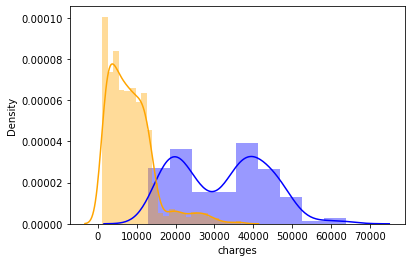

In [231]:
#Distribution plot of charges for smokers vs. non-smokers 
sns.distplot(Smoker['charges'],color='blue')
sns.distplot(NonSmoker['charges'],color='orange')

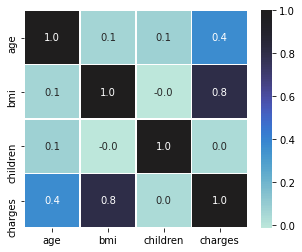

In [232]:
#Correlation plot for just smoker data
plt.figure(figsize=(5,4))
sns.heatmap(Smoker.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

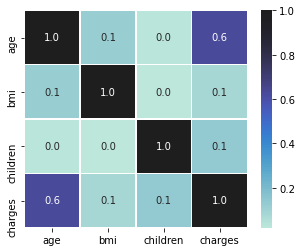

In [233]:
#Correlation plot for just non-smoker data
plt.figure(figsize=(5,4))
sns.heatmap(NonSmoker.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

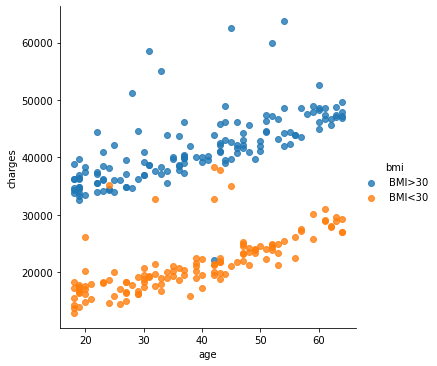

In [244]:
#create a sub-set of data from Smokers with BMI > 30 and BMI < 30. to show that the two groups have seperate trends. 
temp = Smoker[Smoker['bmi'] >= 30]
temp.loc[:, 'bmi'] = 'BMI>30'
temp2 = Smoker[Smoker['bmi'] < 30]
temp2.loc[:, 'bmi'] = 'BMI<30'
smoker_bmi_data  = temp.append(temp2)
sns.lmplot(x='age', y='charges',data=smoker_bmi_data,fit_reg=False, hue='bmi')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

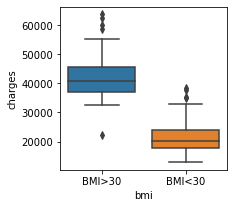

In [235]:
plt.figure(figsize=(3,3))
sns.boxplot(x='bmi',y='charges',data=smoker_bmi_data)

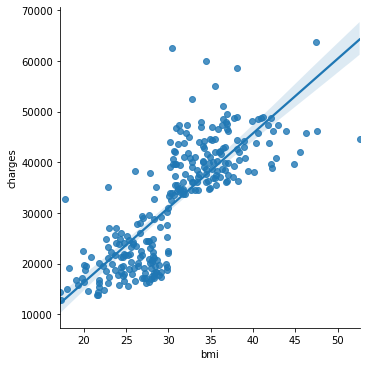

In [236]:
#BMI vs Charges is the highest correlated value for smokers
#Make plot of BMI vs charges for smokers
sns.lmplot(x='bmi', y='charges',data=Smoker)

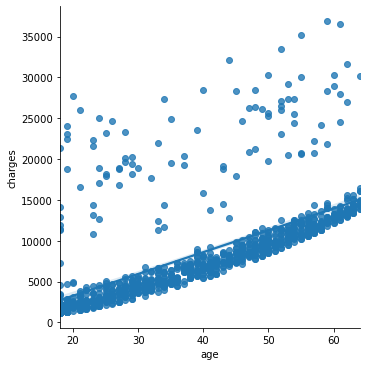

In [237]:
#Age vs Charges is the highest correlated value for non-smokers
#Make plot of Age vs charges for non-smokers.  
sns.lmplot(x='age', y='charges',data=NonSmoker)

### Part 3: BMI

    Females vs Males
    Famles with 0, 1, and 2 kids

P value for sex is: 0.08991704324931137


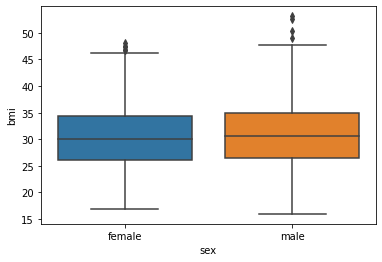

In [238]:
sns.boxplot(x='sex',y='bmi',data=Data)

#create a sub-set of data for Male and Female
Male = Data[Data['sex'] == 'male']
Female = Data[Data['sex'] == 'female']

#generate the t-statistic and P-values to compate the BMI of Males and Females
t_statistic, p_value = ttest_ind(Male['bmi'], Female['bmi'])
print('P value for sex is:', p_value)

              sum_sq        df       F  PR(>F)
children     2.51298   1.00000 0.06841 0.79376
Residual 20717.73872 564.00000     nan     nan


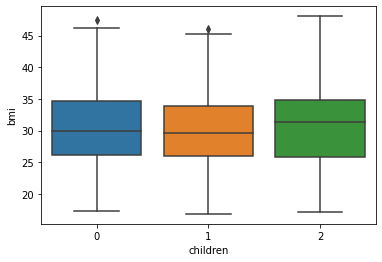

In [239]:
#Sub-set of data with females with less than 3 kids. 
Female = Female[Female['children'] < 3]
sns.boxplot(x='children',y='bmi',data=Female)

#generate the P-values to compate the BMI of Females with 0, 1, and 2 kids. 
mod = ols('bmi ~ children', data = Female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

### Part 4: Regional Persepctive

In [240]:
#Create a data frame with Regional values of Average BMI, Average Charges, and %of Smokers
Region = pd.DataFrame({'Region' : [], 'Smoker': [], 'NonSmoker': [], 'BMI': [], 'Charges': []})
for i in Data['region'].unique():
    temp=Data[Data['region'] == i]
    temp2 = temp[temp['smoker'] == 'yes']['smoker'].count()
    temp3 = temp[temp['smoker'] == 'no']['smoker'].count()
    temp4 = pd.DataFrame({'Region': [i], 'Smoker': [temp2], 'NonSmoker': [temp3],
                          'BMI': [temp['bmi'].mean()], 'Charges': [temp['charges'].mean()]})
    Region  = Region.append(temp4)
Region['%Smoker'] = Region['Smoker']/Region['NonSmoker']
Region = Region.drop(['Smoker', 'NonSmoker'], axis=1)
Region

,Region,BMI,Charges,%Smoker
0,southwest,30.59662,12346.93738,0.21723
0,southeast,33.35599,14735.41144,0.33333
0,northwest,29.19549,12450.84084,0.21805
0,northeast,29.17350,13406.38452,0.26070


              sum_sq         df        F  PR(>F)
region    4057.81390    3.00000 39.48594 0.00000
Residual 45662.38109 1333.00000      nan     nan


<AxesSubplot:xlabel='region', ylabel='bmi'>

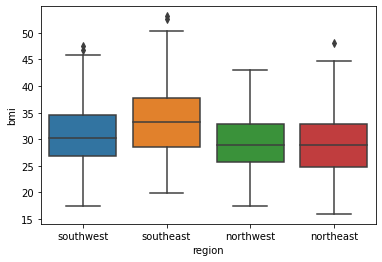

In [241]:
#generate the P-values to compate the BMI of the different regions. 
mod = ols('bmi ~ region', data = Data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
sns.boxplot(x='region',y='bmi',data=Data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

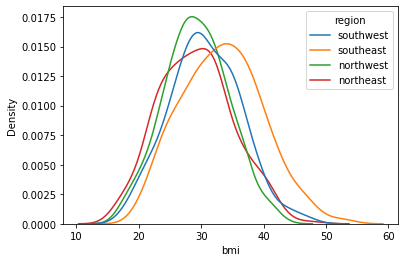

In [242]:
#Visualize the BMI/Region data a via a distribution plot 
sns.kdeplot(data=Data, x="bmi", hue="region")

                     sum_sq         df       F  PR(>F)
region     1281905701.19210    3.00000 2.92614 0.03276
Residual 194656937802.83539 1333.00000     nan     nan


<AxesSubplot:xlabel='region', ylabel='charges'>

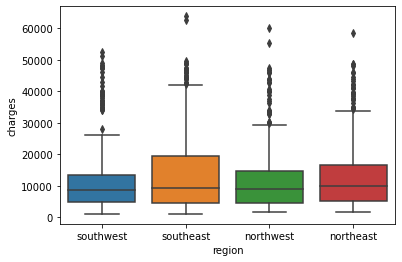

In [243]:
#generate the P-values to compate the Charges of the different regions. 
mod = ols('charges ~ region', data = Data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
sns.boxplot(x='region',y='charges',data=Data)